##**Aim: Identify datasets related to Robotics and Automatics domain and carry out data preprocessing techniques**##

##**Theory**
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the initial and most important step in developing a machine learning model.

When developing a machine learning project, it is not always the case that we encounter clean and well-structured data. In addition, it is necessary to cleanse and prepare data prior to performing any operation on it. For this reason, we employ data preprocessing tasks.

---
> **Need of Data Preprocessing**
---
A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models.

Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.


For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.


Another aspect is that the data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithm are executed in one data set, and best out of them is chosen.

---

> **Steps in data-Preprocessing**

---
1. Handling of missing values
2. Categorical-Encoding
3. Data Scaling etc.

In this experiment we will study the how to handle the missing values, ho to perform categorical encoading and how to scale the data.

#**1. Handling of missing values**

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np

**Import data "4_movie_scores.csv" (.csv form)** (dataset is uploaded in classroom)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data sets _preprocessing_01/4_movie_scores - 4_movie_scores.csv')
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**Check five head values of imported Dataframe**

In [ ]:
df.head()

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**Checking and Selecting Null Values**

In [ ]:
df.isnull()                                       # null position is indicated by boolean operator "True"

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [ ]:
df.notnull()                                         # Non-null position is indicated by boolean operator "True"

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,True,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [ ]:
df.columns

Index(['first_name', 'last_name', 'age', 'Gender', 'pre_movie_score',
       'post_movie_score'],
      dtype='object')

**non-null values from perticular raw or column**

In [ ]:
df['first_name']

0     Root
1      NaN
2    Stark
3    Sofie
4     Emma
Name: first_name, dtype: object

In [ ]:
df[df['first_name'].isnull()]

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
[df['first_name'].notnull()]

[0     True
 1    False
 2     True
 3     True
 4     True
 Name: first_name, dtype: bool]

In [ ]:
df[df['first_name'].notnull()]

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**non-null and null values from multiple raw or column**

In [ ]:
df['pre_movie_score'].isnull()

0    False
1     True
2     True
3    False
4    False
Name: pre_movie_score, dtype: bool

In [ ]:
df['Gender'].notnull()

0     True
1    False
2     True
3     True
4     True
Name: Gender, dtype: bool

In [ ]:
df[(df['pre_movie_score'].isnull()) & df['Gender'].notnull()]

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
2,Stark,Mike,48.0,m,NaN,NaN


**How to drop or replace null values?**

**Actual Dataset**

In [ ]:
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**count of missing values**

**Missing value count along Columns**

In [ ]:
df.isna().sum()

first_name          1
last_name           1
age                 1
Gender              1
pre_movie_score     2
post_movie_score    2
dtype: int64

**Missing value count of complete dataframe**

In [ ]:
df.isna().sum().sum()

8

**Drop rows contains null values**

In [ ]:
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df.dropna()

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df.dropna(axis=1)

""
0
1
2
3
4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**keep rows contains at least one non-null value**

In [ ]:
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df.dropna(thresh=1)

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df.dropna(thresh=2)

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df.dropna(thresh=5)

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**Drop columns contains null values**

In [ ]:
df.dropna(axis=1)

""
0
1
2
3
4


**keep columns contains at least four non-null values**

In [ ]:
df.dropna(thresh=4,axis=1)

,first_name,last_name,age,Gender
0,Root,Joss,36.0,m
1,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m
3,Sofie,Miller,39.0,f
4,Emma,Roy,84.0,f


**Fill null value Data**

In [ ]:
df.fillna("NEW")

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NEW,NEW,NEW,NEW,NEW,NEW
2,Stark,Mike,48.0,m,NEW,NEW
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df['age'].fillna(5)

0    36.0
1     5.0
2    48.0
3    39.0
4    84.0
Name: age, dtype: float64

In [ ]:
df['first_name'].fillna("Empty")

0     Root
1    Empty
2    Stark
3    Sofie
4     Emma
Name: first_name, dtype: object

In [ ]:
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df['first_name'] = df['first_name'].fillna("Empty")

In [ ]:
df

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Stark,Mike,48.0,m,NaN,NaN
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


**Fill 'pre_movie_score' with mean value of 'pre_movie_score'**

**Find mean value of 'pre_movie_score' column**

In [ ]:
df['pre_movie_score'].mean()

In [ ]:
df.fillna(df['pre_movie_score'].mean())

,first_name,last_name,age,Gender,pre_movie_score,post_movie_score
0,Root,Joss,36.0,m,8.0,9.0
1,7.0,7.0,7.0,7.0,7.0,7.0
2,Stark,Mike,48.0,m,7.0,7.0
3,Sofie,Miller,39.0,f,7.0,8.0
4,Emma,Roy,84.0,f,6.0,8.0


In [ ]:
df['pre_movie_score'].mode()

0    6.0
1    7.0
2    8.0
dtype: float64

In [ ]:
df['pre_movie_score'].median()

##**Import dstaset (Students_expenses.csv)**

In [ ]:
dz= pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Students_expenses - Students_expenses.csv")

##**Replace missing values with mean and median**

In [ ]:
##########

Replacing with mean

In [ ]:
dz.median()

<ipython-input-41-98d6a6046c6f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dz.median()


Riya      8300.0
Samual    7100.0
Neeti     8900.0
Shreya    7800.0
dtype: float64

In [ ]:
dz.fillna(dz.mean())

<ipython-input-42-82e594575398>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dz.fillna(dz.mean())


,Expenses,Riya,Samual,Neeti,Shreya
0,January,8100,6200.0,9200.0,8150.0
1,February,9500,7500.0,8970.0,7200.0
2,March,7300,6100.0,8800.0,8100.0
3,April,7800,7200.0,8900.0,7500.0
4,May,8500,6820.0,9100.0,7800.0
5,June,9200,7100.0,8850.0,7750.0


**Replcing with median values**

In [ ]:
########333

In [ ]:
dz.fillna(dz.median())

##**KNN imputer for filling missing values**

**Import "Before_imputation.csv" dataset**

In [ ]:
Before_imputation=pd.read_csv('/content/Before_imputation.csv')
Before_imputation

##**Replace the missing values with KNNImputer**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
After_imputation                                              #After transforming the data becomes a numpy array.

##**Convert the array into dataframe**

In [ ]:
Before_imputation.columns

In [ ]:
After_imputation=pd.DataFrame(After_imputation,columns=['Maths', 'Chemistry', 'Physics', 'Biology'])
After_imputation

---
#**2. CATEGORICAL ENCOADING**



**Import "Encoding_data.csv"**  

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Encoding_data - Encoding_data.csv")

**Import label encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

**Check unique values in column country**

In [ ]:
df.Country.unique()

array(['India', 'US', 'Japan', 'China'], dtype=object)

In [ ]:
z= df.Country.unique()

In [ ]:
len(z)

4

**Encode labels in column 'Country'**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country_labels']= label_encoder.fit_transform(df['Country'])
df

,Unnamed: 0,Country,Age,Salary,Country_labels
0,0,India,35,48000,1
1,1,US,28,42000,3
2,2,Japan,31,46000,2
3,3,India,38,52000,1
4,4,China,30,60000,0
5,5,Japan,34,64000,2


In [ ]:
df_new=df.drop(columns=['Country'])
df_new

,Unnamed: 0,Age,Salary
0,0,35,48000
1,1,28,42000
2,2,31,46000
3,3,38,52000
4,4,30,60000
5,5,34,64000


**Importing one hot encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

## **reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object**

In [ ]:
df.Country.ndim

In [ ]:
df.Country.values

array(['India', 'US', 'Japan', 'India', 'China', 'Japan'], dtype=object)

In [ ]:
df.Country.values.reshape(-1,1)

array([['India'],
       ['US'],
       ['Japan'],
       ['India'],
       ['China'],
       ['Japan']], dtype=object)

In [ ]:
df.Country.values.reshape(-1,1).ndim

2

In [ ]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()
X

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

**To add this back into the original dataframe**

In [ ]:
X.shape

(6, 4)

In [ ]:

df_OneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(X.shape[1])])
df_OneHot

,Country_0,Country_1,Country_2,Country_3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0


**concat dfOneHot with original dataframe**

In [ ]:
df2_new = pd.concat([df, df_OneHot], axis=1)
df2_new

,Unnamed: 0,Country,Age,Salary,Country_labels,Country_0,Country_1,Country_2,Country_3
0,0,India,35,48000,1,0.0,1.0,0.0,0.0
1,1,US,28,42000,3,0.0,0.0,0.0,1.0
2,2,Japan,31,46000,2,0.0,0.0,1.0,0.0
3,3,India,38,52000,1,0.0,1.0,0.0,0.0
4,4,China,30,60000,0,1.0,0.0,0.0,0.0
5,5,Japan,34,64000,2,0.0,0.0,1.0,0.0


In [ ]:
df2_new.drop(columns=['Country'],inplace=True)
df2_new

,Unnamed: 0,Age,Salary,Country_labels,Country_0,Country_1,Country_2,Country_3
0,0,35,48000,1,0.0,1.0,0.0,0.0
1,1,28,42000,3,0.0,0.0,0.0,1.0
2,2,31,46000,2,0.0,0.0,1.0,0.0
3,3,38,52000,1,0.0,1.0,0.0,0.0
4,4,30,60000,0,1.0,0.0,0.0,0.0
5,5,34,64000,2,0.0,0.0,1.0,0.0


#**3.Data Scaling**

**import dataset "scaling_data.csv"**

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/scaling_data - scaling_data.csv")

**Graphical Visualization of data using matplotlib (x and y data)**

NameError: ignored

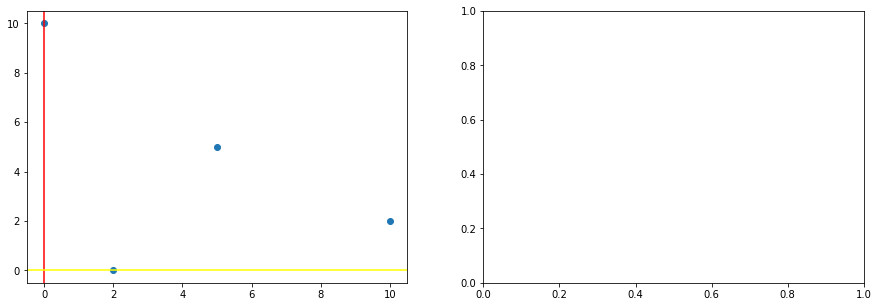

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter( data.X, data.Y)
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")

plt.subplot(1,2,2)
plt.scatter(  std_scaled.X, std_scaled.Y)
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")
plt.show()

**Min_max scaler**

**Import Min-max Scaler (normalization_scaler)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Define, fit and transform min-max scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()                         # y = (x – min) / (max – min)
min_max_scaled = scaler.fit_transform(data)

**Create dataframe of scaled data**

In [ ]:
min_max_scaled = pd.DataFrame(min_max_scaled, columns= ['X','Y','Z'])
min_max_scaled

ValueError: ignored

**Scaled and unscaled data representation using matplotlib**

AttributeError: ignored

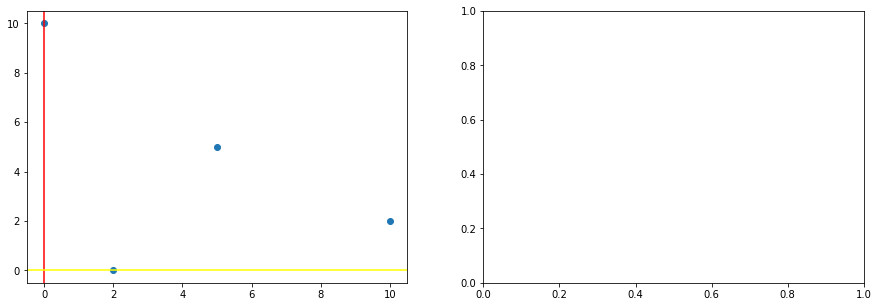

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter( data.X, data.Y)
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")

plt.subplot(1,2,2)
plt.scatter(  min_max_scaled.X, min_max_scaled.Y)
plt.show()

**Data scaling using Standard scaler**

**Import Standard Scaler (normalization_scaler)**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Apply StandardSaler on data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()                   # X new = (X – X mean) / ( X std )
std_scaled = scaler1.fit_transform(df)
std_scaled

ValueError: ignored

**Create dataframe of scaled data**

In [ ]:
std_scaled = pd.DataFrame(std_scaled,columns= ['X','Y','Z'] )
std_scaled

**Scaled and unscaled data representation using matplotlib**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter( data.X, data.Y)
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")

plt.subplot(1,2,2)
plt.scatter(  std_scaled.X, std_scaled.Y)
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="yellow", label="y=0")
plt.show()

##**Complete each and every steps of Task-1 and Task-2**


#**Task-1 (missing values)**
1.   **Import necessory libraries for kNN imputation**
2.   **Create dataframe X using following data with column names as 'Class A','Class B', 'Class C', 'Class D'**

---
                X = [[1, 3, np.nan, 4], [6, np.nan, 8, np.nan], [5, 4, 2, 3], [9, np.nan, 6, 8]]

---


3. **find number of missing values in each columns**
4. **find total number of missing values in dataframe**
5. **Find percent missing values in dataframe**
6. **Drop the rows having missing values**
7. **Keep the rows having with atleast 3 non-null values**
8. **Keep the columns having with atleast 3 non-null values**
9. **Drop the columns having missing values**
10. **Fill the missing values with mean values**
11. **Use KNN imputer to impute the missing values**
12. **Save the imputed data in dataframe as variable Y**  





#**Task-2 (KNN imputer and Categorical Encoading)**
1. import dataset (Loan_status.csv)
2. calculate sum of missing values in each columns
3. In Dataframe, Keep only missing values categorical data type columns
4. fill the null values with categorical imputer
5. create new dataframe with all previously categorical non-null columns and newly fill value columns
6. use the lable encoder to encode the categorical data
6. use one-hot encoder to encode the "Property_Area" column
7. Use mim-max scaler and standard scaler for 'ApplicantIncome' column.

In [ ]:
#task 1

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
X = [[1, 3, np.nan, 4], [6, np.nan, 8, np.nan], [5, 4, 2, 3], [9, np.nan, 6, 8],['']]
X=pd.DataFrame(X,columns=['Class A','Class B','Class C','Class D'])
X

,Class A,Class B,Class C,Class D
0,1,3.0,NaN,4.0
1,6,NaN,8.0,NaN
2,5,4.0,2.0,3.0
3,9,NaN,6.0,8.0
4,,NaN,NaN,NaN


In [ ]:
X.isna().sum()

Class A    0
Class B    3
Class C    2
Class D    2
dtype: int64

In [ ]:
(X.isna().sum()/X.size)*100

Class A     0.0
Class B    15.0
Class C    10.0
Class D    10.0
dtype: float64

In [ ]:
X.drop(index=(4) ,axis=0,inplace=True)
X

,Class A,Class B,Class C,Class D
0,1,3.0,NaN,4.0
1,6,NaN,8.0,NaN
2,5,4.0,2.0,3.0
3,9,NaN,6.0,8.0


In [ ]:
X.dropna(thresh=3)

,Class A,Class B,Class C,Class D
0,1,3.0,NaN,4.0
2,5,4.0,2.0,3.0
3,9,NaN,6.0,8.0


In [ ]:
X.fillna(X.mean())

,Class A,Class B,Class C,Class D
0,1,3.0,5.333333,4.0
1,6,3.5,8.000000,5.0
2,5,4.0,2.000000,3.0
3,9,3.5,6.000000,8.0


In [ ]:
imputer = KNNImputer(n_neighbors=2)
Y = imputer.fit_transform(X)
Y

array([[1. , 3. , 5. , 4. ],
       [6. , 3.5, 8. , 5.5],
       [5. , 4. , 2. , 3. ],
       [9. , 3.5, 6. , 8. ]])

**TASK 2**

Task-2 (KNN imputer and Categorical Encoading)
1.import dataset (Loan_status.csv)
2.calculate sum of missing values in each columns
3.In Dataframe, Keep only missing values categorical data type columns
4.fill the null values with categorical imputer
5.create new dataframe with all previously categorical non-null columns and newly fill value columns
6.use the lable encoder to encode the categorical data
7.use one-hot encoder to encode the "Property_Area" column
8.Use mim-max scaler and standard scaler for 'ApplicantIncome' column.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data sets _preprocessing_01/Loan_status - Loan_status.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum().sum()

149

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dz = df.drop(columns=['Loan_ID','Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status'],axis=1)
dz.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0


In [ ]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [ ]:
Gender = np.array(dz["Gender"])
Gender_fill = imputer.fit_transform(Gender)

Married = np.array(dz["Married"])
Married_fill = imputer.fit_transform(Married)

Dependents = np.array(dz["Dependents"])
Dependents_fill = imputer.fit_transform(Dependents)

Self_Employed = np.array(dz["Self_Employed"])
Self_Employed_fill = imputer.fit_transform(Self_Employed)

LoanAmount = np.array(dz["LoanAmount"])
LoanAmount_fill = imputer.fit_transform(LoanAmount)

Loan_Amount_Term = np.array(dz["Loan_Amount_Term"])
Loan_Amount_Term_fill = imputer.fit_transform(Loan_Amount_Term)

Credit_History = np.array(dz["Credit_History"])
Credit_History_fill = imputer.fit_transform(Credit_History)

In [ ]:
Dict2 = {"Gender_fill" : Gender_fill, "Married_fill" : Married_fill, "Dependents_fill": Dependents_fill , "Self_Employed_fill" : Self_Employed_fill, "LoanAmount_fill": LoanAmount_fill , "Loan_Amount_Term_fill": Loan_Amount_Term_fill , "Credit_History_fill": Credit_History_fill}
df2 = pd.DataFrame(Dict2)
df2

,Gender_fill,Married_fill,Dependents_fill,Self_Employed_fill,LoanAmount_fill,Loan_Amount_Term_fill,Credit_History_fill
0,Male,No,0,No,120.0,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


In [ ]:
df3 = pd.concat([df[['Loan_ID','Education','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Status']],df2],axis=1)
df3.head()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_fill,Married_fill,Dependents_fill,Self_Employed_fill,LoanAmount_fill,Loan_Amount_Term_fill,Credit_History_fill
0,LP001002,Graduate,5849,0.0,Urban,Y,Male,No,0,No,120.0,360.0,1.0
1,LP001003,Graduate,4583,1508.0,Rural,N,Male,Yes,1,No,128.0,360.0,1.0
2,LP001005,Graduate,3000,0.0,Urban,Y,Male,Yes,0,Yes,66.0,360.0,1.0
3,LP001006,Not Graduate,2583,2358.0,Urban,Y,Male,Yes,0,No,120.0,360.0,1.0
4,LP001008,Graduate,6000,0.0,Urban,Y,Male,No,0,No,141.0,360.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
unique = df3.Gender_fill.unique()
print(unique)
len(unique)

['Male' 'Female']


2

In [ ]:
df3

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_fill,Married_fill,Dependents_fill,Self_Employed_fill,LoanAmount_fill,Loan_Amount_Term_fill,Credit_History_fill
0,LP001002,Graduate,5849,0.0,Urban,Y,Male,No,0,No,120.0,360.0,1.0
1,LP001003,Graduate,4583,1508.0,Rural,N,Male,Yes,1,No,128.0,360.0,1.0
2,LP001005,Graduate,3000,0.0,Urban,Y,Male,Yes,0,Yes,66.0,360.0,1.0
3,LP001006,Not Graduate,2583,2358.0,Urban,Y,Male,Yes,0,No,120.0,360.0,1.0
4,LP001008,Graduate,6000,0.0,Urban,Y,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y,Female,No,0,No,71.0,360.0,1.0
610,LP002979,Graduate,4106,0.0,Rural,Y,Male,Yes,3+,No,40.0,180.0,1.0
611,LP002983,Graduate,8072,240.0,Urban,Y,Male,Yes,1,No,253.0,360.0,1.0
612,LP002984,Graduate,7583,0.0,Urban,Y,Male,Yes,2,No,187.0,360.0,1.0


In [ ]:
df3['Gender_fill'] = label_encoder.fit_transform(df3['Gender_fill'])
df3

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_fill,Married_fill,Dependents_fill,Self_Employed_fill,LoanAmount_fill,Loan_Amount_Term_fill,Credit_History_fill
0,LP001002,Graduate,5849,0.0,Urban,Y,1,No,0,No,120.0,360.0,1.0
1,LP001003,Graduate,4583,1508.0,Rural,N,1,Yes,1,No,128.0,360.0,1.0
2,LP001005,Graduate,3000,0.0,Urban,Y,1,Yes,0,Yes,66.0,360.0,1.0
3,LP001006,Not Graduate,2583,2358.0,Urban,Y,1,Yes,0,No,120.0,360.0,1.0
4,LP001008,Graduate,6000,0.0,Urban,Y,1,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y,0,No,0,No,71.0,360.0,1.0
610,LP002979,Graduate,4106,0.0,Rural,Y,1,Yes,3+,No,40.0,180.0,1.0
611,LP002983,Graduate,8072,240.0,Urban,Y,1,Yes,1,No,253.0,360.0,1.0
612,LP002984,Graduate,7583,0.0,Urban,Y,1,Yes,2,No,187.0,360.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()

In [ ]:
unique = df.Property_Area.unique()
print(unique)
len(unique)

['Urban' 'Rural' 'Semiurban']


3

In [ ]:
df4 = df3
df4.Property_Area.shape
df4.Property_Area.ndim
df4.Property_Area.values
df4.Property_Area.values.reshape(-1,1)

array([['Urban'],
       ['Rural'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Rural'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Rural'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Rural'],
       ['Semiurban'],
       ['Semiurban'],
       ['Semiurban'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Urban'],
       ['Rural'],
       ['Semiurban'],
       ['Rural'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Urban'],
       ['Semiurban'],
       ['Semiurban'],
       ['Semiurban'],
       [

In [ ]:
df4.Property_Area.values.reshape(-1,1).ndim

2

In [ ]:
array = OneHotEncoder.fit_transform(df4.Property_Area.values.reshape(-1,1)).toarray()
array.shape

(614, 3)

In [ ]:
OneHot = pd.DataFrame(array,columns= ["Property_Area_" + str(int(i)) for i in range(array.shape[1])])
OneHot.head()

,Property_Area_0,Property_Area_1,Property_Area_2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
df5 = pd.concat([df4,OneHot],axis=1)
df5

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_fill,Married_fill,Dependents_fill,Self_Employed_fill,LoanAmount_fill,Loan_Amount_Term_fill,Credit_History_fill,Property_Area_0,Property_Area_1,Property_Area_2
0,LP001002,Graduate,5849,0.0,Urban,Y,1,No,0,No,120.0,360.0,1.0,0.0,0.0,1.0
1,LP001003,Graduate,4583,1508.0,Rural,N,1,Yes,1,No,128.0,360.0,1.0,1.0,0.0,0.0
2,LP001005,Graduate,3000,0.0,Urban,Y,1,Yes,0,Yes,66.0,360.0,1.0,0.0,0.0,1.0
3,LP001006,Not Graduate,2583,2358.0,Urban,Y,1,Yes,0,No,120.0,360.0,1.0,0.0,0.0,1.0
4,LP001008,Graduate,6000,0.0,Urban,Y,1,No,0,No,141.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y,0,No,0,No,71.0,360.0,1.0,1.0,0.0,0.0
610,LP002979,Graduate,4106,0.0,Rural,Y,1,Yes,3+,No,40.0,180.0,1.0,1.0,0.0,0.0
611,LP002983,Graduate,8072,240.0,Urban,Y,1,Yes,1,No,253.0,360.0,1.0,0.0,0.0,1.0
612,LP002984,Graduate,7583,0.0,Urban,Y,1,Yes,2,No,187.0,360.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_scaled = scaler.fit_transform(df3[['ApplicantIncome']])

In [ ]:
min_max_scaled = pd.DataFrame(min_max_scaled, columns = ['ApplicationIncome_scaled'])
min_max_scaled.head()

,ApplicationIncome_scaled
0,0.070489
1,0.054830
2,0.035250
3,0.030093
4,0.072356


In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Standard_scaled = Scaler.fit_transform(df3[['ApplicantIncome']])
Standard_scaled

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [ ]:
Standard_scaled = pd.DataFrame(Standard_scaled, columns = ['ApplicationIncome_scaled'])
Standard_scaled.head()

,ApplicationIncome_scaled
0,0.072991
1,-0.134412
2,-0.393747
3,-0.462062
4,0.097728


In [ ]:
#the end